<a href="https://colab.research.google.com/github/luzlopez376/TFG/blob/main/Creaci%C3%B3n_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
try:
  import shap
except:
  !pip install shap
  import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.6 MB/s eta 0:00:00


# Data Science

## Dataset Loading

 contains clinical and demographic information on patients diagnosed with heart failure

In [3]:
df = pd.read_csv('datos_wearA_ventana.csv')

In [4]:
print(df[df.estado == 0].count()['estado'])
print(df[df.estado == 1].count()['estado'])

929
768


## Dataset Visualization

Show all the variables that we have in the dataset.
- *sensor_x_min*: the coordinate X minimum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_x_max*: the coordinate X maximum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_x_range*: the coordinate X range of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_x_std*: the coordinate X standard deviation of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_y_min*: the coordinate Y minimum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_y_max*: the coordinate Y maximum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_y_range*: the coordinate Y range of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_y_std*: the coordinate Y standard deviation of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_z_min*: the coordinate Z minimum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_z_max*: the coordinate Z maximum value of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_z_range*: the coordinate Z range of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- *sensor_z_std*: the coordinate Z standard deviation of the temporal serie. It will depend on the sensor (gyroscope or accelerometer).
- **estado**: If the patient fell or not (Boolean)

The last one (estado) is the class label.

In [5]:
print(df.columns.tolist())
print(f'The total number of variables is {len(df.columns.tolist()) -1}')

['acc_x_min', 'acc_x_max', 'acc_x_range', 'acc_x_mean', 'acc_x_std', 'gyr_x_min', 'gyr_x_max', 'gyr_x_range', 'gyr_x_mean', 'gyr_x_std', 'acc_y_min', 'acc_y_max', 'acc_y_range', 'acc_y_mean', 'acc_y_std', 'gyr_y_min', 'gyr_y_max', 'gyr_y_range', 'gyr_y_mean', 'gyr_y_std', 'acc_z_min', 'acc_z_max', 'acc_z_range', 'acc_z_mean', 'acc_z_std', 'gyr_z_min', 'gyr_z_max', 'gyr_z_range', 'gyr_z_mean', 'gyr_z_std', 'estado']
The total number of variables is 30


### Type of data
Show the type of the data. It contains strings (object).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x_min    1696 non-null   float64
 1   acc_x_max    1696 non-null   float64
 2   acc_x_range  1696 non-null   float64
 3   acc_x_mean   1696 non-null   float64
 4   acc_x_std    1697 non-null   float64
 5   gyr_x_min    1694 non-null   float64
 6   gyr_x_max    1694 non-null   float64
 7   gyr_x_range  1694 non-null   float64
 8   gyr_x_mean   1694 non-null   float64
 9   gyr_x_std    1697 non-null   float64
 10  acc_y_min    1696 non-null   float64
 11  acc_y_max    1696 non-null   float64
 12  acc_y_range  1696 non-null   float64
 13  acc_y_mean   1696 non-null   float64
 14  acc_y_std    1697 non-null   float64
 15  gyr_y_min    1694 non-null   float64
 16  gyr_y_max    1694 non-null   float64
 17  gyr_y_range  1694 non-null   float64
 18  gyr_y_mean   1694 non-null   float64
 19  gyr_y_

### Statistical information
Show statistical information about the variables

In [9]:
print(df.describe())

         acc_x_min    acc_x_max  acc_x_range   acc_x_mean    acc_x_std  \
count  1693.000000  1693.000000  1693.000000  1693.000000  1693.000000   
mean     -0.269004    14.403393    14.672397     5.827437     2.492903   
std       8.458079    13.102608    17.730755     4.561086     2.211822   
min     -62.701523    -9.506684     0.059820    -9.607582     0.029907   
25%      -5.240282     9.494720     4.792825     1.882194     1.011657   
50%       2.074577    12.279965     8.650054     8.371464     1.754543   
75%       6.350551    15.404992    16.687545     9.333284     3.335506   
max      11.062019    78.283585   140.985108    13.622618    16.296797   

         gyr_x_min    gyr_x_max  gyr_x_range   gyr_x_mean    gyr_x_std  ...  \
count  1693.000000  1693.000000  1693.000000  1693.000000  1693.000000  ...   
mean     -3.646427     3.542096     7.188523    -0.022836     1.358197  ...   
std       3.056584     3.048026     5.432045     0.477894     0.962561  ...   
min     -19.79099

### Histogram

To output multiple subplots, the figure containing the passed axes is being cleared.


array([[<Axes: title={'center': 'acc_x_min'}>,
        <Axes: title={'center': 'acc_x_max'}>,
        <Axes: title={'center': 'acc_x_range'}>,
        <Axes: title={'center': 'acc_x_mean'}>,
        <Axes: title={'center': 'acc_x_std'}>,
        <Axes: title={'center': 'gyr_x_min'}>],
       [<Axes: title={'center': 'gyr_x_max'}>,
        <Axes: title={'center': 'gyr_x_range'}>,
        <Axes: title={'center': 'gyr_x_mean'}>,
        <Axes: title={'center': 'gyr_x_std'}>,
        <Axes: title={'center': 'acc_y_min'}>,
        <Axes: title={'center': 'acc_y_max'}>],
       [<Axes: title={'center': 'acc_y_range'}>,
        <Axes: title={'center': 'acc_y_mean'}>,
        <Axes: title={'center': 'acc_y_std'}>,
        <Axes: title={'center': 'gyr_y_min'}>,
        <Axes: title={'center': 'gyr_y_max'}>,
        <Axes: title={'center': 'gyr_y_range'}>],
       [<Axes: title={'center': 'gyr_y_mean'}>,
        <Axes: title={'center': 'gyr_y_std'}>,
        <Axes: title={'center': 'acc_z_min'}>

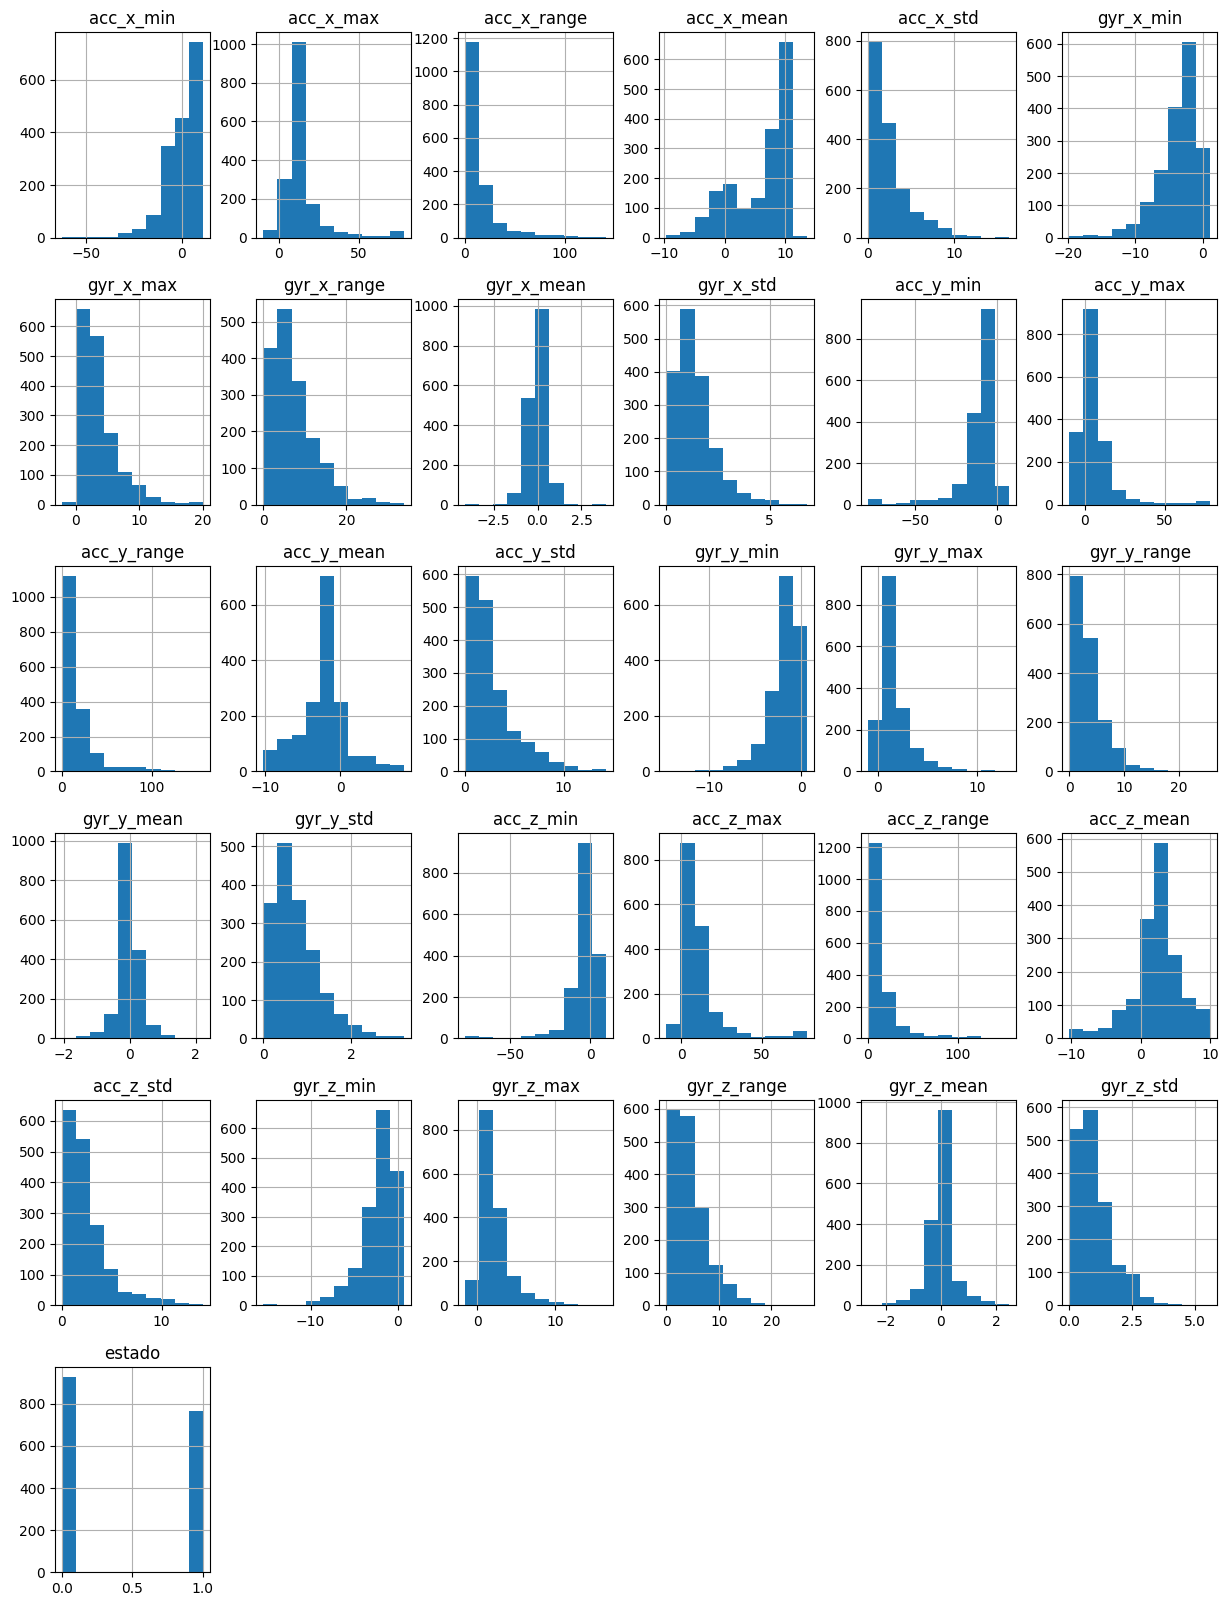

In [10]:
  fig = plt.figure(figsize = (15,20))
  ax = fig.gca()
  df.hist(ax = ax)

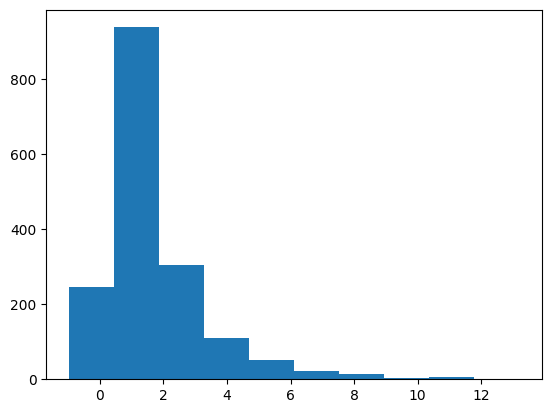

In [11]:
data = df['gyr_y_max']
plt.hist(data)
plt.show()

### Box Plots

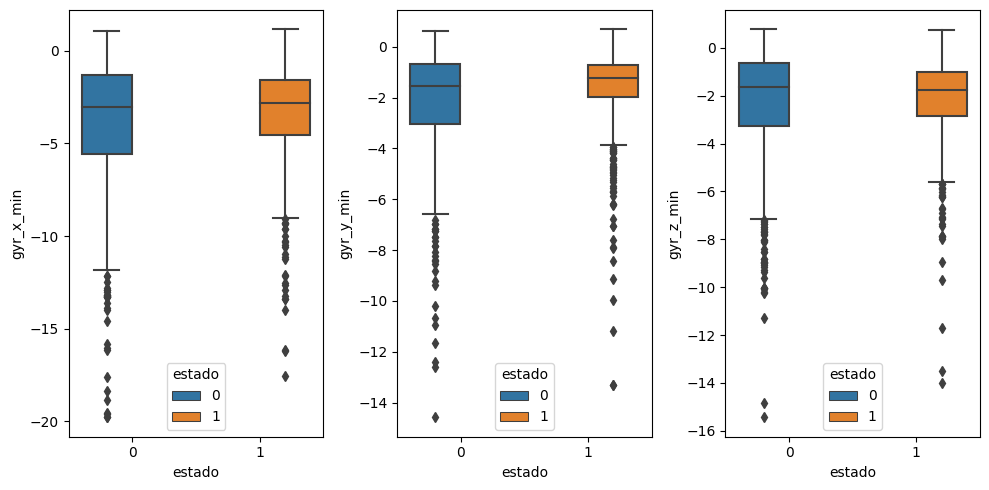

In [12]:
# Create box plots of the minimum variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="gyr_x_min", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="gyr_y_min", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="gyr_z_min", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

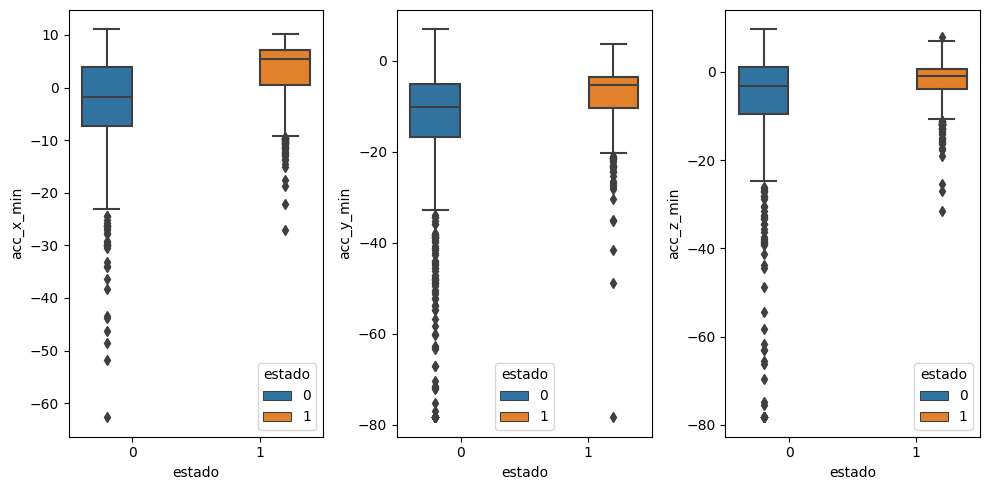

In [13]:
# Create box plots of the minimum variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="acc_x_min", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="acc_y_min", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="acc_z_min", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

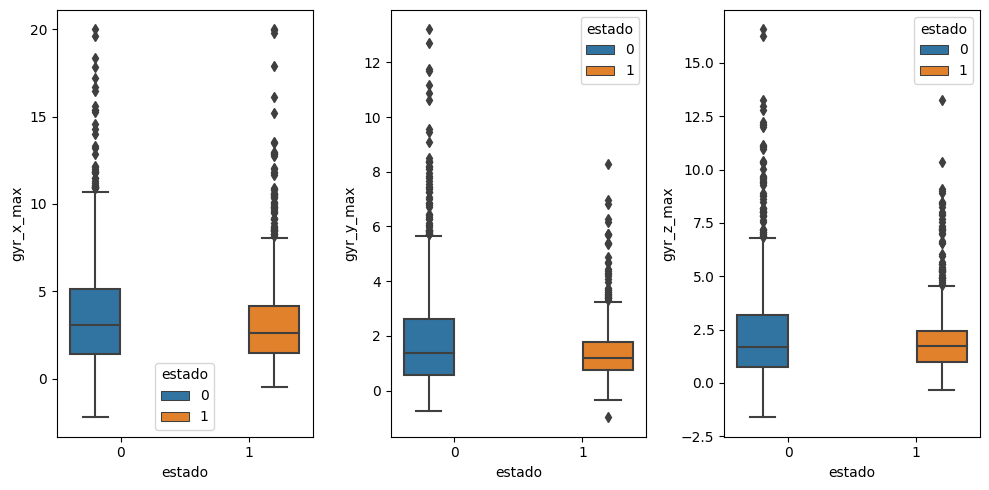

In [14]:
# Create box plots of the maximum variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="gyr_x_max", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="gyr_y_max", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="gyr_z_max", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

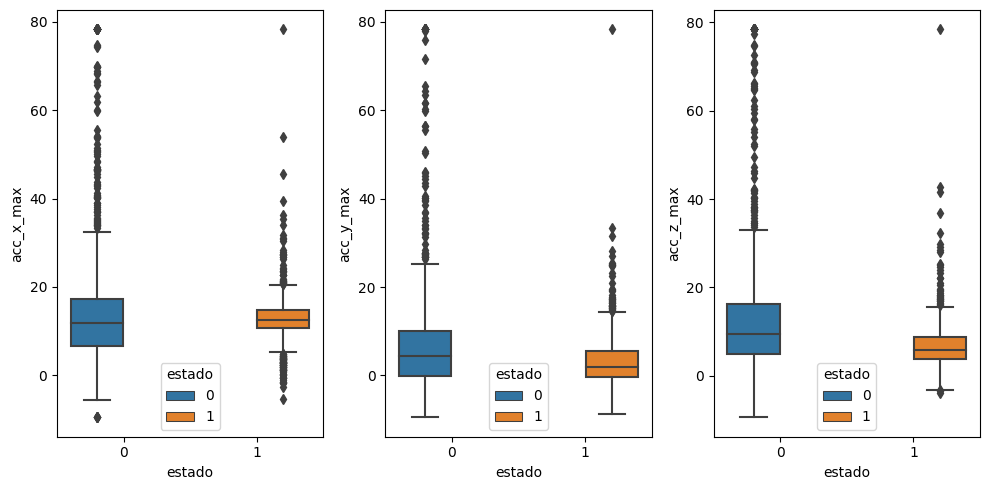

In [15]:
# Create box plots of the maximum variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="acc_x_max", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="acc_y_max", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="acc_z_max", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

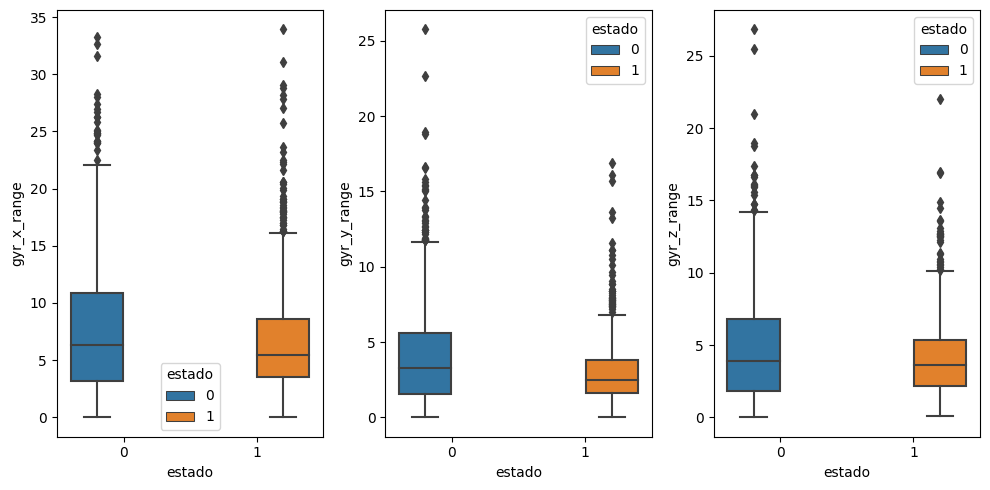

In [16]:
# Create box plots of the range variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="gyr_x_range", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="gyr_y_range", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="gyr_z_range", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

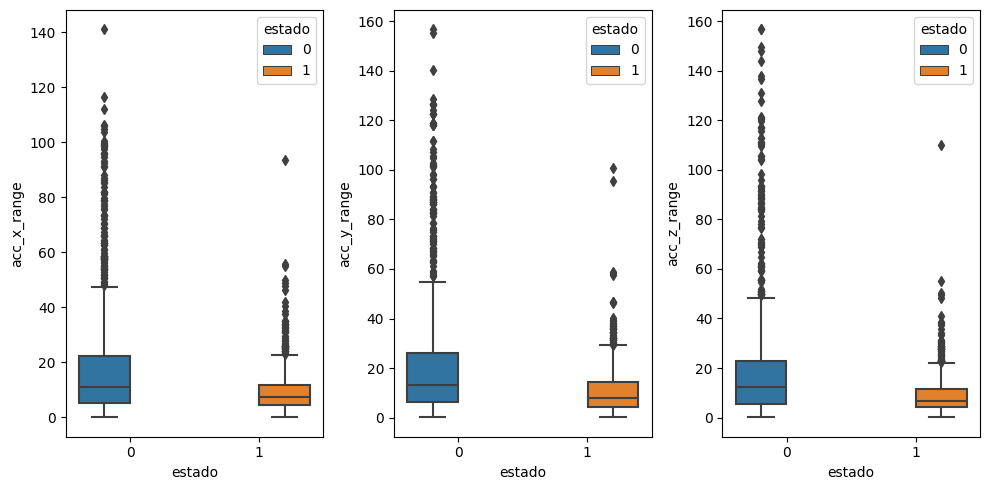

In [17]:
# Create box plots of the range variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="acc_x_range", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="acc_y_range", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="acc_z_range", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

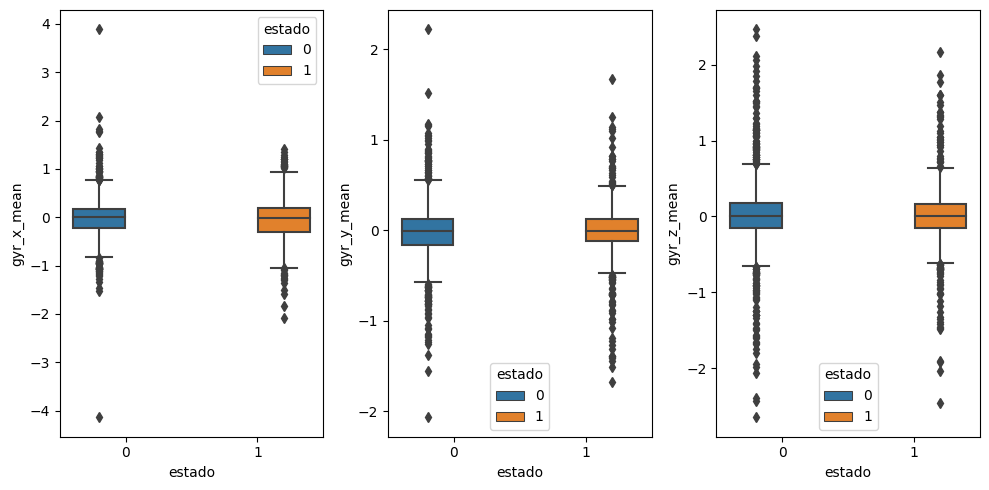

In [18]:
# Create box plots of the mean variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="gyr_x_mean", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="gyr_y_mean", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="gyr_z_mean", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

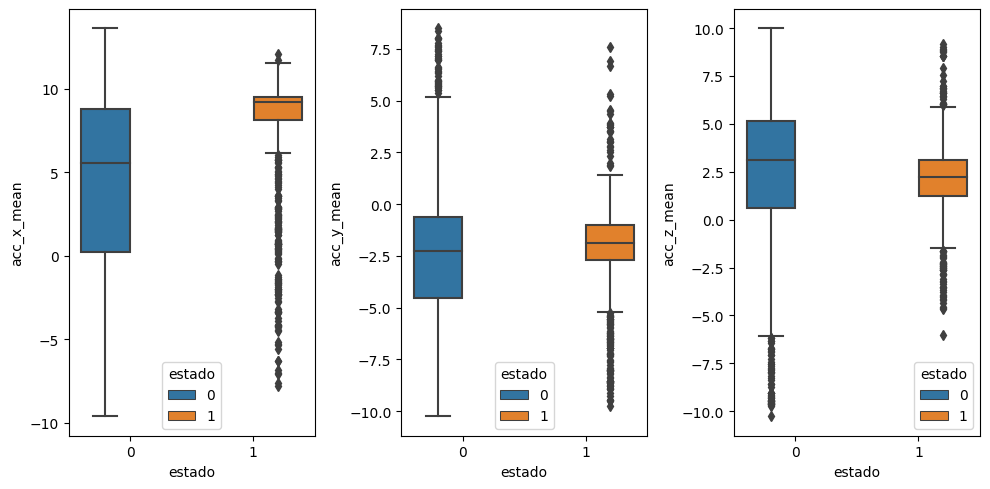

In [19]:
# Create box plots of the mean variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="acc_x_mean", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="acc_y_mean", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="acc_z_mean", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

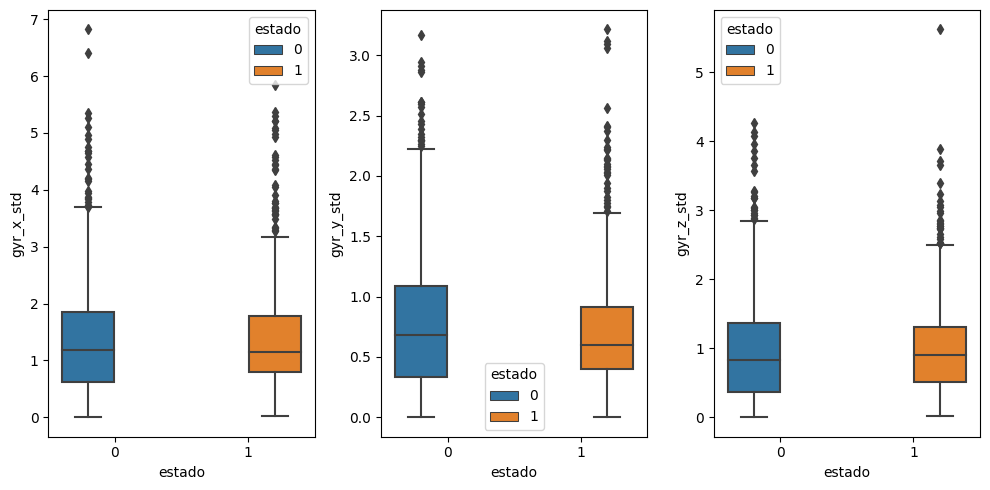

In [20]:
# Create box plots of the std variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="gyr_x_std", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="gyr_y_std", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="gyr_z_std", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

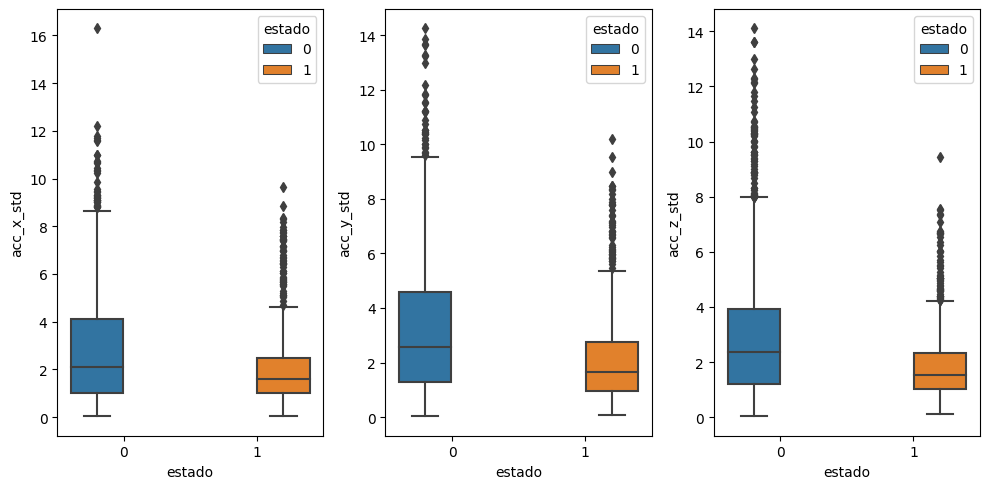

In [21]:
# Create box plots of the std variables
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
sns.boxplot(data=df, y="acc_x_std", x="estado", hue="estado", ax=axs[0])
sns.boxplot(data=df, y="acc_y_std", x="estado", hue="estado", ax=axs[1])
sns.boxplot(data=df, y="acc_z_std", x="estado", hue="estado", ax=axs[2])
plt.tight_layout()
plt.show()

### Delete outliers



These were temporaly outliers while training the model. However, they aren't consider outliers anymore, so they're commented.

In [ ]:
# df = df.drop(df[df['acc_x_min'] < -40].index)
# df = df.drop(df[df['acc_y_min'] < -50].index)
# df = df.drop(df[df['acc_z_min'] < -50].index)
# df = df.drop(df[df['gyr_x_min'] < -15].index)
# df = df.drop(df[df['gyr_y_min'] < -9].index)
# df = df.drop(df[df['gyr_z_min'] < -11].index)

# df = df.drop(df[df['acc_x_max'] > 55].index)
# df = df.drop(df[df['acc_y_max'] > 40].index)
# df = df.drop(df[df['acc_z_max'] > 45].index)
# df = df.drop(df[df['gyr_x_max'] > 15].index)
# df = df.drop(df[df['gyr_y_max'] > 10].index)
# df = df.drop(df[df['gyr_z_max'] > 11].index)

# df = df.drop(df[df['acc_x_range'] > 70].index)
# df = df.drop(df[df['acc_y_range'] > 100].index)
# df = df.drop(df[df['acc_z_range'] > 60].index)
# df = df.drop(df[df['gyr_x_range'] > 30].index)
# df = df.drop(df[df['gyr_y_range'] > 15].index)
# df = df.drop(df[df['gyr_z_range'] > 20].index)

# df = df.drop(df[(df['gyr_x_mean'] < -2) | (df['gyr_x_mean'] > 2)].index)
# df = df.drop(df[(df['gyr_y_mean'] < -1) | (df['gyr_x_mean'] > 1)].index)
# df = df.drop(df[(df['gyr_z_mean'] < -2) | (df['gyr_x_mean'] > 2)].index)

# df = df.drop(df[df['acc_x_std'] > 10].index)
# df = df.drop(df[df['acc_y_std'] > 12].index)
# df = df.drop(df[df['acc_z_std'] > 12].index)
# df = df.drop(df[df['gyr_x_std'] > 5].index)
# df = df.drop(df[df['gyr_y_std'] > 2.5].index)
# df = df.drop(df[df['gyr_z_std'] > 4].index)


### Correlation matrix

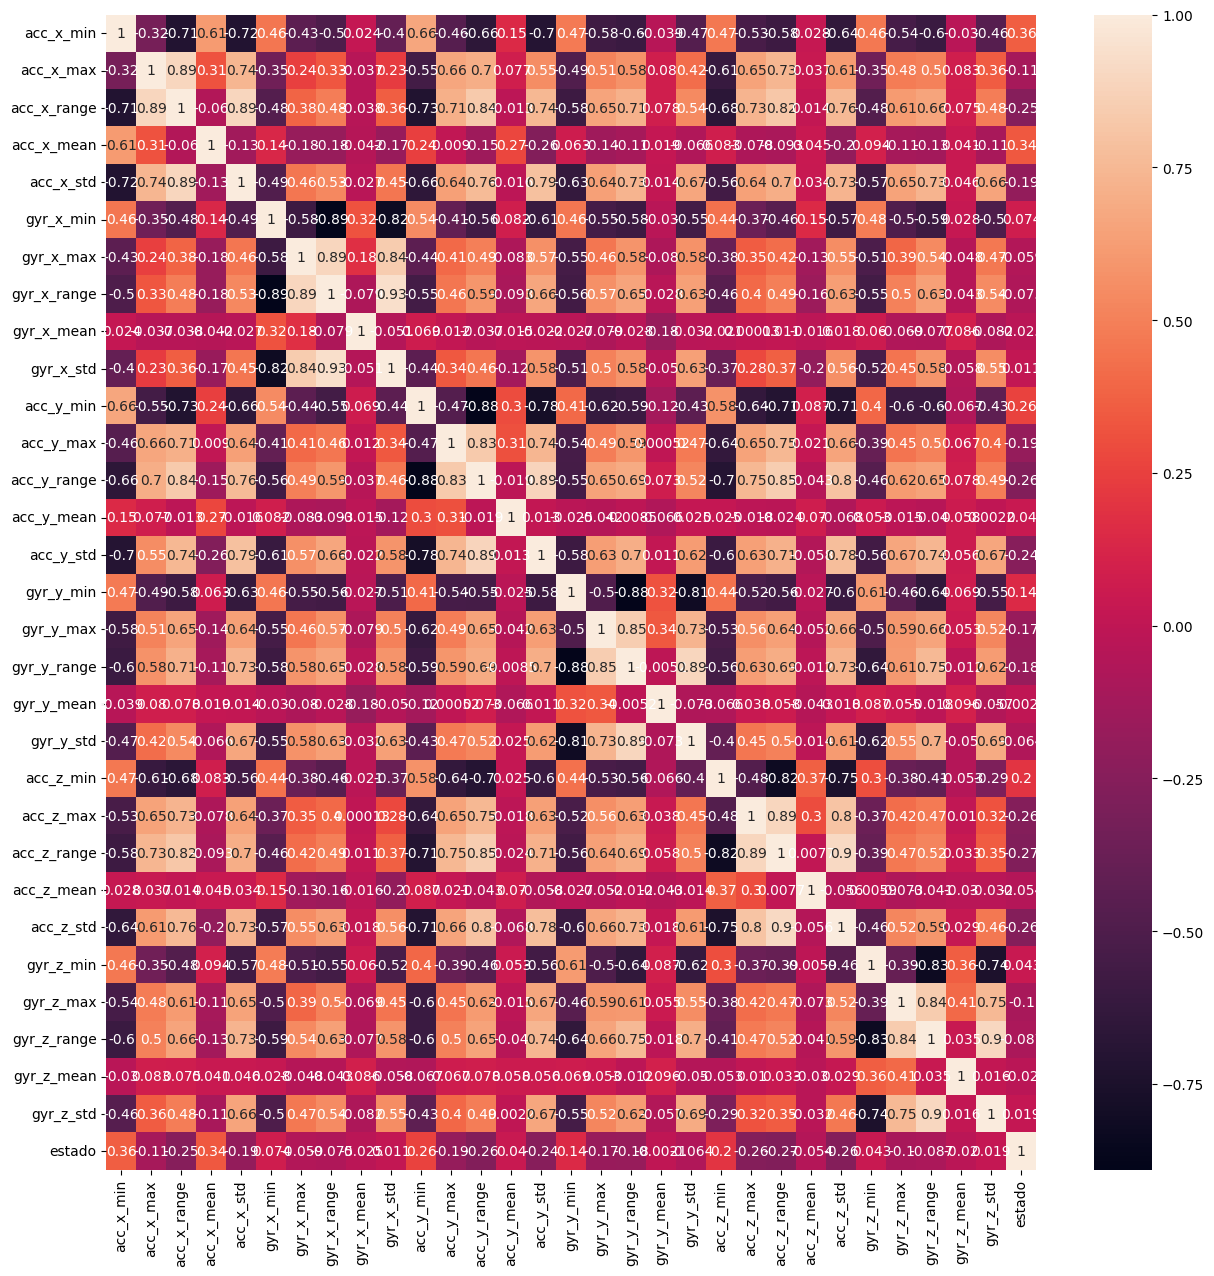

In [22]:
corr_matrix = df.corr()
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Delete columns



This columns were deleted seeing the correlation between all the attributes which were over ±0.8.

However, using this technique, we don't obtaing the best model, so we discard these eliminations.

In [ ]:
# df = df.drop(['acc_x_max'], axis=1)
# df = df.drop(['acc_x_range'], axis=1)
# df = df.drop(['gyr_x_min'], axis=1)
# df = df.drop(['gyr_x_max'], axis=1)
# df = df.drop(['gyr_x_range'], axis=1)
# df = df.drop(['acc_y_min'], axis=1)
# df = df.drop(['acc_y_max'], axis=1)
# df = df.drop(['acc_y_range'], axis=1)
# df = df.drop(['gyr_y_min'], axis=1)
# df = df.drop(['gyr_y_max'], axis=1)
# df = df.drop(['gyr_y_range'], axis=1)
# df = df.drop(['acc_z_min'], axis=1)
# df = df.drop(['acc_z_max'], axis=1)
# df = df.drop(['acc_z_range'], axis=1)
# df = df.drop(['gyr_z_min'], axis=1)
# df = df.drop(['gyr_z_max'], axis=1)
# df = df.drop(['gyr_z_range'], axis=1)

# Data Science

## Check missing values

Machine learning models can't work if datasets have missing values or replicated

In [ ]:
df.isnull().sum()

acc_x_min      0
acc_x_max      0
acc_x_range    0
acc_x_mean     0
acc_x_std      0
gyr_x_min      0
gyr_x_max      0
gyr_x_range    0
gyr_x_mean     0
gyr_x_std      0
acc_y_min      0
acc_y_max      0
acc_y_range    0
acc_y_mean     0
acc_y_std      0
gyr_y_min      0
gyr_y_max      0
gyr_y_range    0
gyr_y_mean     0
gyr_y_std      0
acc_z_min      0
acc_z_max      0
acc_z_range    0
acc_z_mean     0
acc_z_std      0
gyr_z_min      0
gyr_z_max      0
gyr_z_range    0
gyr_z_mean     0
gyr_z_std      0
estado         0
dtype: int64

In [26]:
df = df.dropna()
df = df.drop_duplicates()

## Split Dataset

In [27]:
df_X = df.drop('estado', axis=1)
columns = df_X.columns
df_y = df['estado']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=42)

## Balance dataset

In our dataset we could have more data of class than the other, so we have to balance the dataset. Doing this, the model can work better because it has more data of the small class, so that it wouldn't be biased of the other one.

In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Normalize/Standarize dataset

Some machine learning algorithms works better when we have normalize dataset.

In [34]:
# Scale the training data
type_normalization = "standard"

if type_normalization == "minmax":
  scaler = MinMaxScaler()
else:
  scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Feature Selection

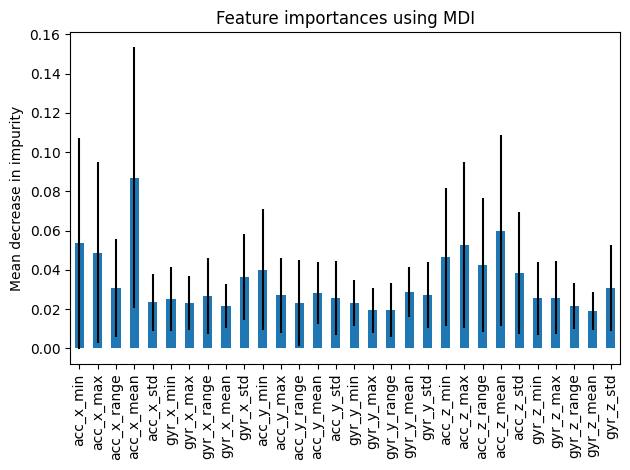

In [42]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_scaled, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

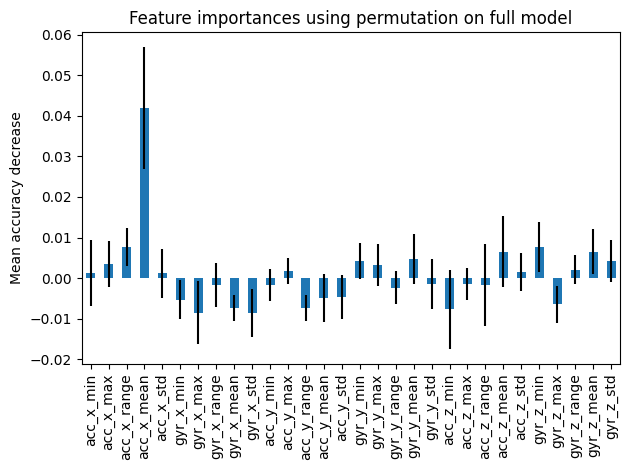

In [43]:
result = permutation_importance(
    forest, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

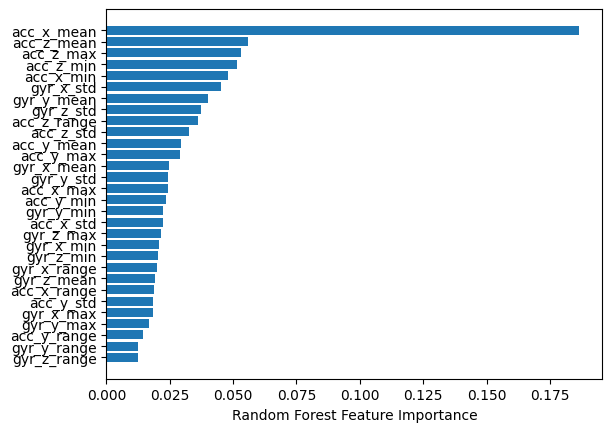

In [44]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Permutation Importance')

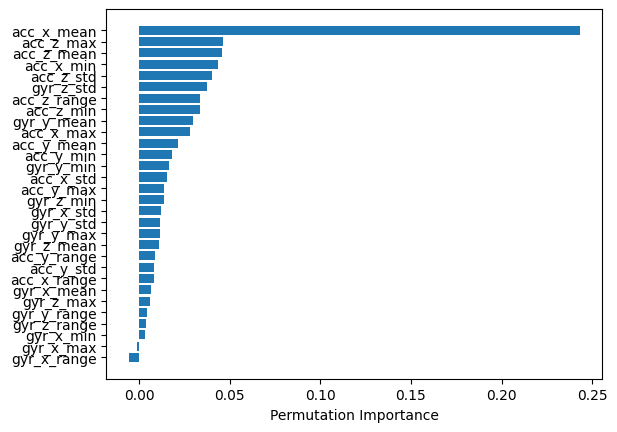

In [45]:
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

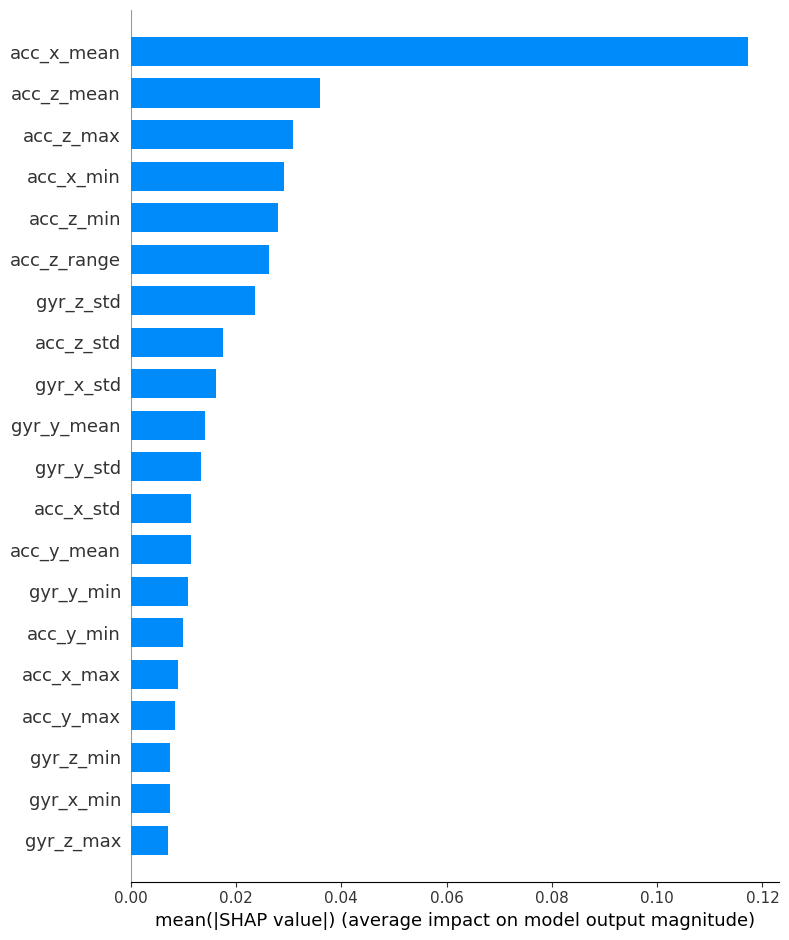

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Delete some variables.

It is important to split again the dataset.

Finally, we use SHAP to delete some variables.

In [ ]:
# Eliminar estas columnas no influyen especialmente en el resultado
df = df.drop(['gyr_x_max'], axis=1)
df = df.drop(['gyr_x_range'], axis=1)
df = df.drop(['gyr_x_mean'], axis=1)
df = df.drop(['acc_y_max'], axis=1)
df = df.drop(['acc_y_range'], axis=1)
df = df.drop(['acc_y_std'], axis=1)
df = df.drop(['gyr_y_range'], axis=1)
df = df.drop(['gyr_z_max'], axis=1)
df = df.drop(['gyr_z_range'], axis=1)
df = df.drop(['gyr_z_mean'], axis=1)

# Train ML model

We use RandomizedSearchCV to test what kind of algorithm depending on the parameters. It also computes the cross validation to evaluate the model after training


## kNN

In [50]:
knn2 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5, 10, 20, 30, 100]
}
grid_search = GridSearchCV(knn2, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 5}
Best Score:  0.7799074074074075


In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=20)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.72058824 0.77941176 0.77941176 0.77941176 0.82352941 0.83823529
 0.77941176 0.77941176 0.70588235 0.82352941 0.73529412 0.79411765
 0.85294118 0.76470588 0.76119403 0.76119403 0.82089552 0.7761194
 0.7761194  0.71641791]
0.78 accuracy with a standard deviation of 0.04


## Random Forest Classifier

In [52]:
clf1= RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf1, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.7991557734204793


In [56]:
clf = RandomForestClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split = 2, n_estimators = 50)
clf = clf.fit(X_train_scaled, y_train)
scores = cross_val_score(clf, X_train_scaled, y_train, cv=20)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.05


## Support Vector Machines

In [58]:
svm2 = SVC()

param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto']
}
grid_search = GridSearchCV(svm2, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.7821840958605664


In [59]:
svm = SVC(gamma='scale', kernel = 'rbf')
svm.fit(X_train_scaled, y_train)
scores = cross_val_score(svm, X_train_scaled, y_train, cv=20)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.04


## Voting Classifier

In [60]:
knn1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(max_depth = None, min_samples_leaf= 1, min_samples_split = 2, n_estimators = 50)
svm1 = SVC(gamma = 'auto', kernel = 'rbf')

eclf = VotingClassifier(estimators=[('knn', knn1), ('dt', clf2), ('svm', svm1)])

param_grid = {
    'voting' : ['soft', 'hard']
}
grid_search = GridSearchCV(eclf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 363, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 404, in predict_proba
    self._collect_probas(X), axis=0, weights=self._weights_not_none
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_

Best Parameters:  {'voting': 'hard'}
Best Score:  0.7976906318082789


In [61]:
eclf1 = VotingClassifier(estimators=[('knn', knn), ('dt', clf), ('svm', svm)], voting='hard')
eclf1.fit(X_train_scaled, y_train)
scores = cross_val_score(eclf1, X_train_scaled, y_train, cv=20)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.05


# Metrics

In this part of the document we obtaing the results. We need to change the word "train" to "test" when we want to know the results of the test data. If we want to change the algorithm, we can change "clf" to "knn", "svm" or "eclf1".

With all these combinations we obtain all the possible results.

## Accuracy and Confusion Matrix

In [74]:
# Make predictions on the scaled testing data
y_pred = svm.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix of the model
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', confusion)

Accuracy: 0.8141592920353983
Confusion matrix:
 [[150  37]
 [ 26 126]]


Text(0.5, 1.0, 'Normalized Confusion Matrix')

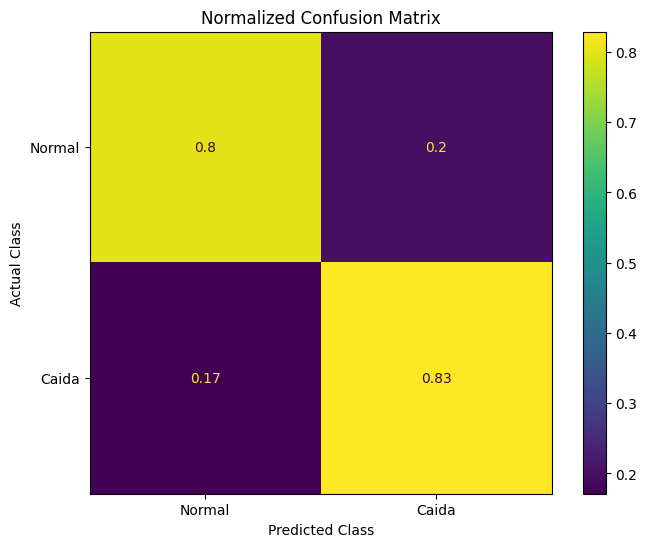

In [75]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix with normalized data
confussion = confusion_matrix(y_test, y_pred, normalize= 'true')
ConfusionMatrixDisplay(confussion, display_labels=['Normal', 'Caida']).plot(ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.set_title('Normalized Confusion Matrix')
# plt.show()

## Precision, Recall and FScore

In [76]:
res = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)

print(f'Precision = {res[0]}')
print(f'Recall = {res[1]}')
print(f'FScore = {res[2]}')

Precision = 0.7730061349693251
Recall = 0.8289473684210527
FScore = 0.8
